In [17]:
import numpy as np
import cv2

classes = []
with open('/content/drive/MyDrive/coco.names.txt', 'r') as f:
  classes =  [line.strip() for line in f.readlines()]
  
classes_size = len(classes)
colors =  np.random.uniform(0,255,size=(classes_size,3))
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [18]:
img = cv2.imread('/content/drive/MyDrive/cars.jpg')
height, width, channels =  img.shape
blob = cv2.dnn.blobFromImage(img,1.0/256, (448,448),(0,0,0),swapRB=True, crop=False)

In [19]:
# YOLO3 모델을 로드
yolo_model = cv2.dnn.readNet('/content/drive/MyDrive/yolov3.weights',
                             '/content/drive/MyDrive/yolov3.cfg')
# layer_names = yolo_model.getLayerNames()
# print(layer_names)
print(yolo_model.getUnconnectedOutLayersNames())
out_layers = yolo_model.getUnconnectedOutLayersNames()
# for i in yolo_model.getUnconnectedOutLayers():
#   print(layer_names[i[0]-1])

['yolo_82', 'yolo_94', 'yolo_106']


In [20]:
yolo_model.setInput(blob)   # 테스트영상을 신경망에 입력  (이미지)
output3 =  yolo_model.forward(out_layers) # 출력을 output3 객체에 저장

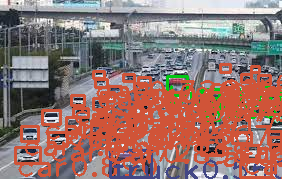

In [21]:
from google.colab.patches import cv2_imshow
# 이미지에 바운드 
class_ids, confidences, boxes =[],[],[]
for output in output3:
  for v85 in output:
    score = v85[5:]; # 확률이 0.5를 넘는 바운딩
    class_id =  np.argmax(score)
    confidence =  score[class_id]
    if confidence > 0.5:    # 신뢰도가 50% 이상
      centerx, centery = int(v85[0]*width), int(v85[1]*height)
      w,h = int(v85[2]*width), int(v85[3]*height)
      x,y = int(centerx-w/2), int(centery-h/2)
      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)
indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)   # 노이즈를 제거하여 이미지에 맞게  순수박스를 생성

# 영상에 바운딩 박스를 표시
for i in range(len(boxes)):
  if i in indexes:
    x,y,w,h = boxes[i]
    text = str(classes[class_ids[i]]) + '%.3f'%confidences[i]
    cv2.rectangle(img,(x,y),(x+w,y+h),colors[class_ids[i]],2)
    cv2.putText(img,text,(x,y+30),cv2.FONT_HERSHEY_PLAIN,2,colors[class_ids[i]],2)    
# cv2.imshow('Object detection', img)
cv2_imshow(img)  # Colab
cv2.waitKey(0)
cv2.destroyAllWindows()